In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
data = pd.read_csv("../data/newsData/raw_analyst_ratings.csv",index_col=0)
print(f"===data info=== \n{data.info()}\n")
print(f"===data columns=== \n{data.columns}\n")
print(f"===data head=== \n{data.head()}\n")
print(f"===data shape=== \n{data.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 0 to 1413848
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 64.4+ MB
===data info=== 
None

===data columns=== 
Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

===data head=== 
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benz

## apply different eda
1, removing duplicates
2, remove null values

In [3]:
# Remove duplicates
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows found: {duplicate_count}")
data.drop_duplicates(inplace=True)

#remove null values

null_val=data.isnull().sum()
print(f"null values before cleaning {null_val}\n")
data.dropna(subset=['headline'], inplace=True)
print(f"data after cleaning null values {data.shape[0]}")

Total duplicate rows found: 1
null values before cleaning headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

data after cleaning null values 1407327


In [4]:
# Date Parsing

data['date'] = pd.to_datetime(data['date'], format='ISO8601', utc=True)
data.set_index('date', inplace=True)
print("\nDataFrame Index is now set to Date (UTC).")
print(data.head()) 


DataFrame Index is now set to Date (UTC).
                                                                    headline  \
date                                                                           
2020-06-05 14:30:54+00:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 14:45:20+00:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 08:30:07+00:00                      71 Biggest Movers From Friday   
2020-05-22 16:45:06+00:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 15:38:59+00:00  B of A Securities Maintains Neutral on Agilent...   

                                                                         url  \
date                                                                           
2020-06-05 14:30:54+00:00  https://www.benzinga.com/news/20/06/16190091/s...   
2020-06-03 14:45:20+00:00  https://www.benzinga.com/news/20/06/16170189/s...   
2020-05-26 08:30:07+00:00  https://www.benzinga.com/news/20/05/16103463/7...

In [5]:


# Descriptive Statistics
# Headline Length Analysis

data['headline_length'] = data['headline'].apply(lambda x: len(str(x)))
print(data['headline_length'].describe())

count    1.407327e+06
mean     7.312054e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
# Publisher Activity
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


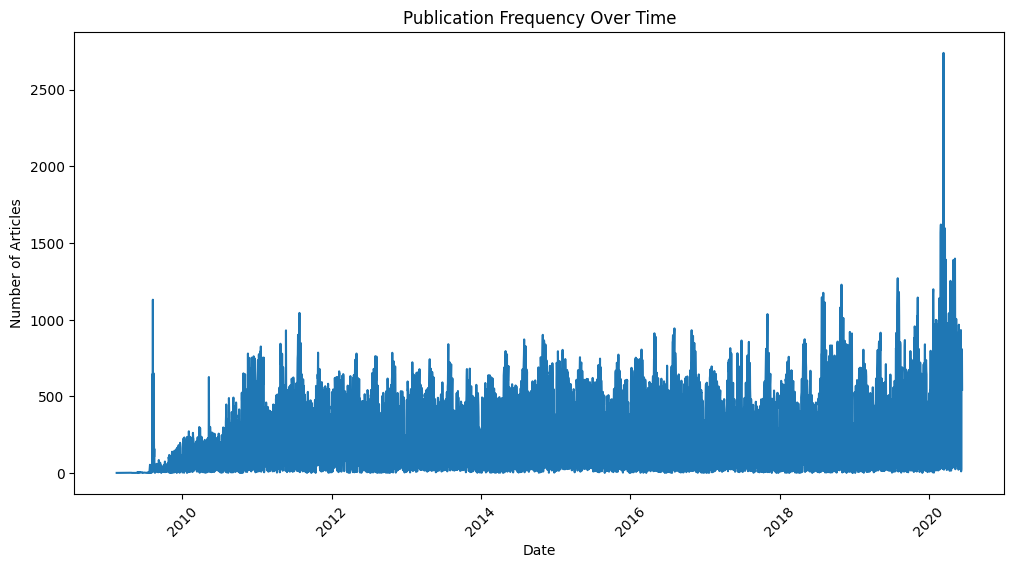

In [7]:
# Publication Date Analysis
data['day'] = data.index.date
publication_trends = data['day'].value_counts().sort_index()
publication_trends.plot(figsize=(12, 6))
plt.title("Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Sentiment Analysis
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [9]:
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['TextBlob_Category'] = data['sentiment'].apply(sentiment_category)
print(data[['headline','sentiment','TextBlob_Category']])

                                                                    headline  \
date                                                                           
2020-06-05 14:30:54+00:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 14:45:20+00:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 08:30:07+00:00                      71 Biggest Movers From Friday   
2020-05-22 16:45:06+00:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 15:38:59+00:00  B of A Securities Maintains Neutral on Agilent...   
...                                                                      ...   
2011-08-29 04:00:00+00:00             Top Narrow Based Indexes For August 29   
2011-06-22 04:00:00+00:00  Recap: Wednesday's Top Percentage Gainers and ...   
2011-06-21 04:00:00+00:00  UPDATE: Oppenheimer Color on China Zenix Auto ...   
2011-06-21 04:00:00+00:00  Oppenheimer Initiates China Zenix At Outperfor...   
2011-05-12 04:00:00+00:00  China Zenix A

C:\Users\Acer\AppData\Local\Temp\ipykernel_1712\4008450042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette='viridis',)


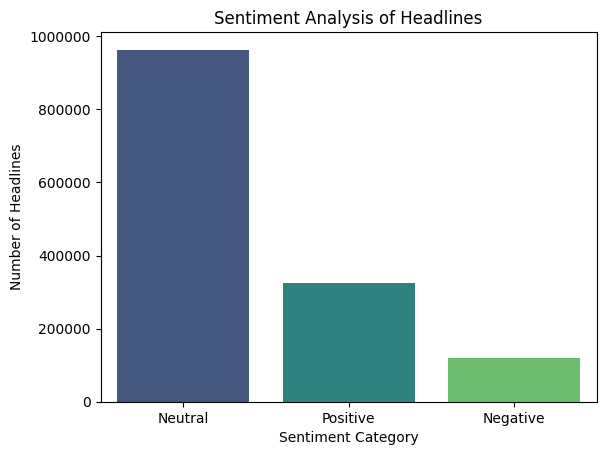

In [10]:
# Count number of headlines in each category
sentiment_counts = data['TextBlob_Category'].value_counts()


sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette='viridis',)
plt.title("Sentiment Analysis of Headlines")
plt.ylabel("Number of Headlines")
plt.xlabel("Sentiment Category")
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1712\142122784.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = data.resample('M')['sentiment'].mean()


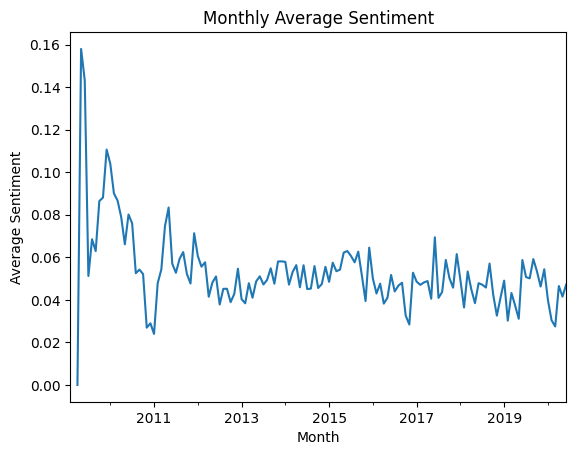

In [11]:
# Correlation Analysis
monthly_sentiment = data.resample('M')['sentiment'].mean()
monthly_sentiment.plot()
plt.title("Monthly Average Sentiment")
plt.xlabel("Month")
plt.ylabel("Average Sentiment")
plt.show()

In [12]:
# Text Analysis (Common Keywords)
# Create a CountVectorizer to extract keywords
if data['headline'].isnull().any() or data['headline'].empty:
    print("Error: 'headline' column contains NaN values or is empty.")
else:
    # Create a CountVectorizer to extract keywords
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams and bigrams
    X = vectorizer.fit_transform(data['headline'])

    # Check the shape of the sparse matrix
    print(f"Shape of the feature matrix X: {X.shape}")

    # Sum the counts for each keyword and create a Series
    if X.shape[1] > 0:  # Ensure there are features to sum
        keyword_counts = pd.Series(X.sum(axis=0).A1, index=vectorizer.get_feature_names_out())  # .A1 to convert to 1D array
        # Sort the Series and display the top 10 common keywords and phrases
        top_keywords = keyword_counts.sort_values(ascending=False).head(10)
        print(top_keywords)
    else:
        print("No features found in the headline data.")

Shape of the feature matrix X: (1407327, 2015679)
vs          162099
stocks      161776
est         140604
eps         128897
market      120558
shares      114313
reports     108710
update       91723
earnings     87399
sales        79645
dtype: int64


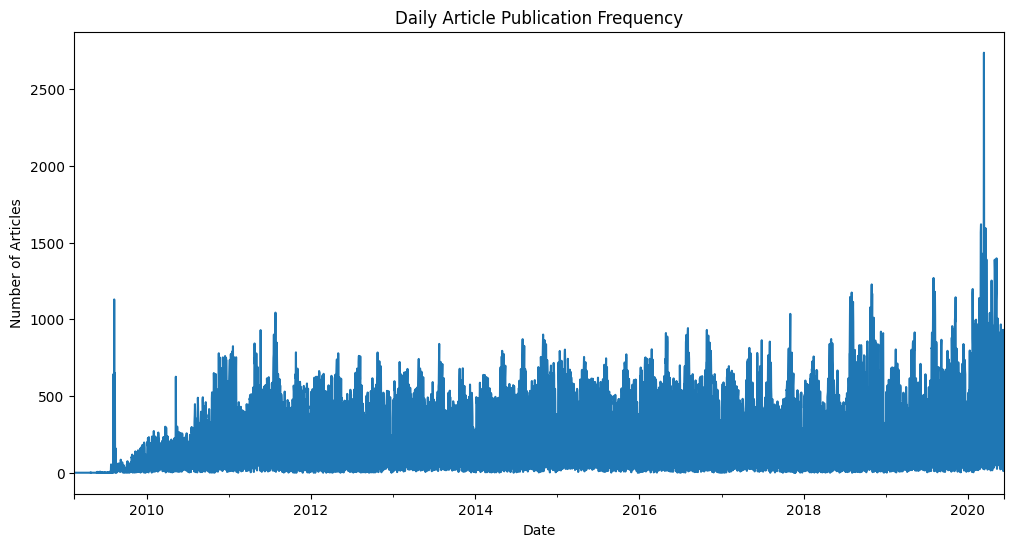

In [13]:
# Time Series Analysis
# Daily Article Frequency
daily_counts = data.resample('D').count()['headline']
daily_counts.plot(figsize=(12, 6))
plt.title("Daily Article Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

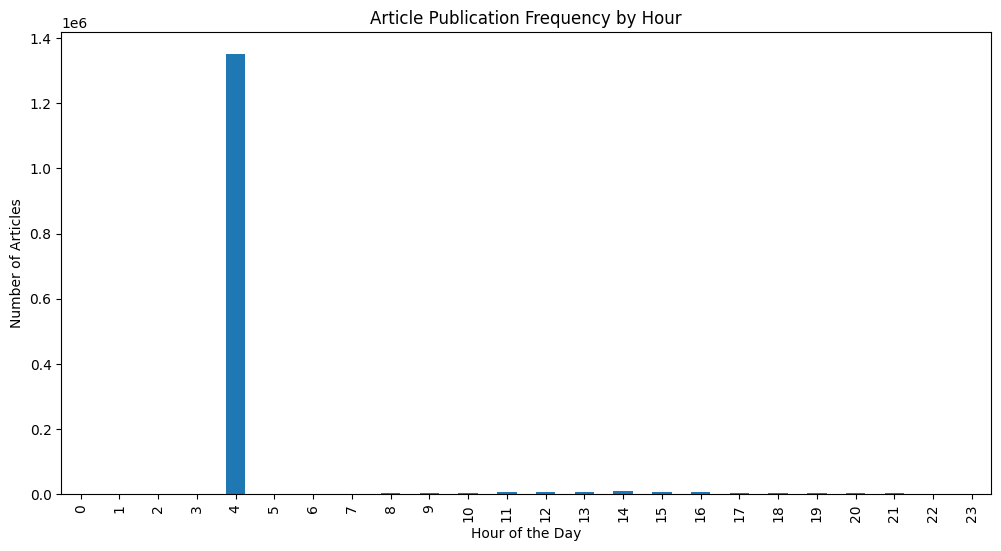

In [14]:
# Publication Times Analysis
data['hour'] = data.index.hour
hourly_counts = data['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Article Publication Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Articles")
plt.show()

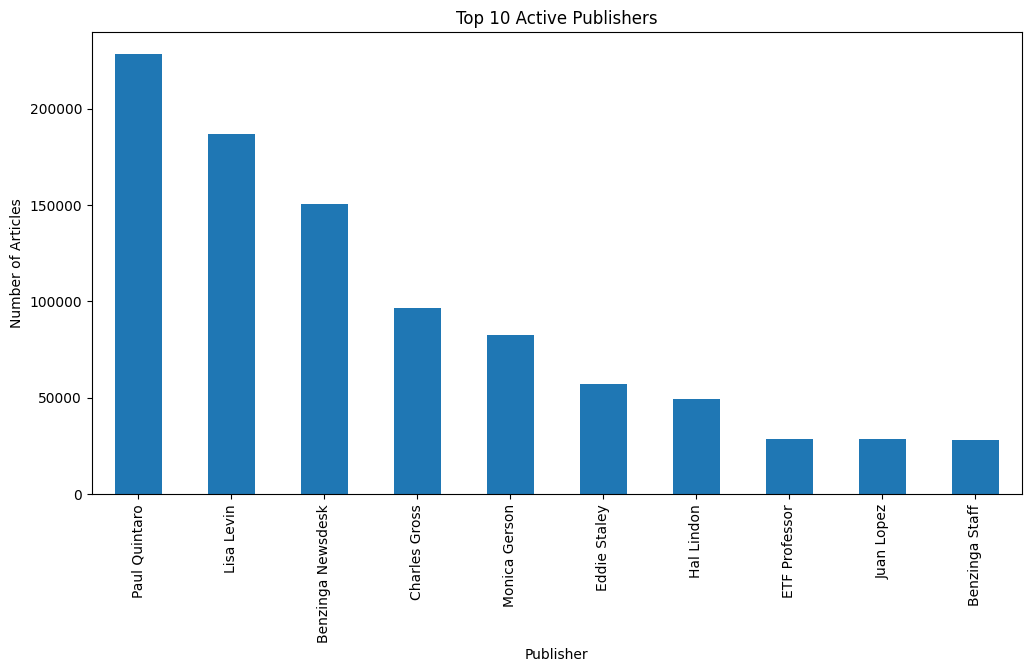

In [15]:
# Publisher Analysis
top_publishers = data['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.show()

In [16]:
# Unique Domain Analysis
data['publisher_domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)
domain_counts = data['publisher_domain'].value_counts().head(10)
print(domain_counts)    

publisher_domain
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
